In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/aqi.csv')
display(df.head())

Mounted at /content/drive


,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


## Get basic information about the dataset.

In [3]:
# Basic structure
df.info()

# Summary statistics for numerical columns
df.describe()

# Shape of the dataset (rows, columns)
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


(235785, 9)

## Check for missing values and duplicates.

In [4]:
# Missing values per column
df.isnull().sum()

# Count duplicate rows
df.duplicated().sum()


np.int64(0)

## Drop empty columns

In [5]:
df = df.drop('note', axis=1)
display(df.head())

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...


## Air quality status over time

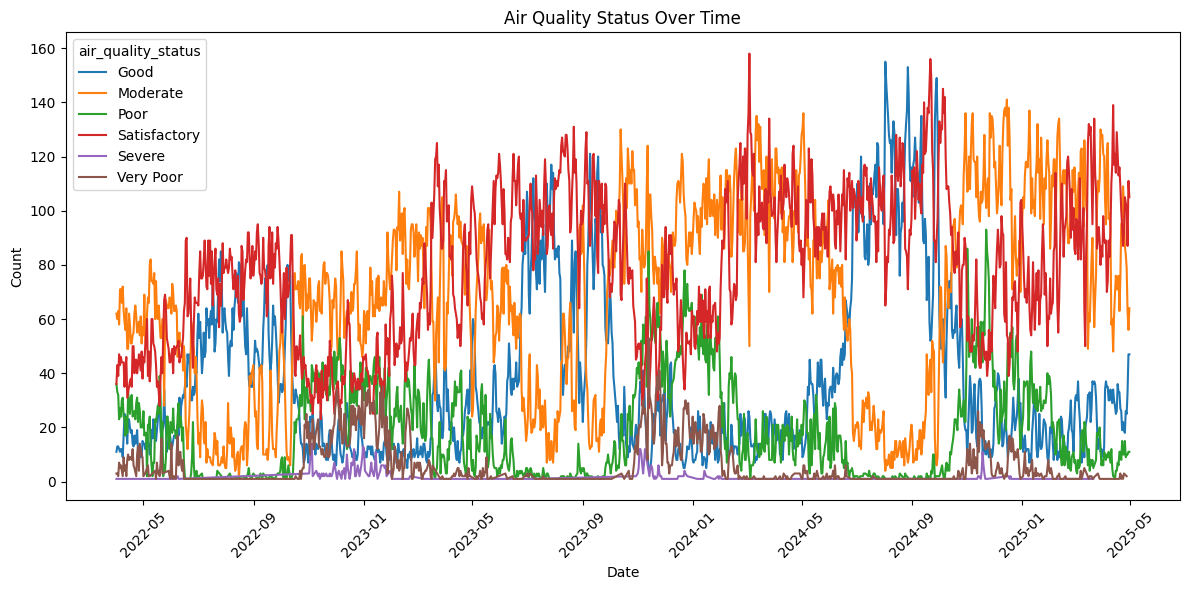

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Group by date and air_quality_status and count occurrences
status_counts = df.groupby(['date', 'air_quality_status']).size().reset_index(name='count')

# Create a time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=status_counts, x='date', y='count', hue='air_quality_status')
plt.title('Air Quality Status Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot shows how the count of each air quality status (Good, Moderate, Poor, Satisfactory, Severe) changes over time. Each colored line represents a different air quality status, and you can see how the number of days with that status fluctuates over the dates in your dataset. This helps to visualize trends and patterns in air quality over time.



## Count of Prominent pollutants

In [7]:
display(df['prominent_pollutants'].value_counts())

,count
prominent_pollutants,
PM10,111053
PM2.5,59670
O3,16202
"PM2.5,PM10",13199
CO,12867
"PM10,O3",3914
SO2,3815
NO2,3012
"PM10,CO",2658


## Air Quality Status Analysis State Wise

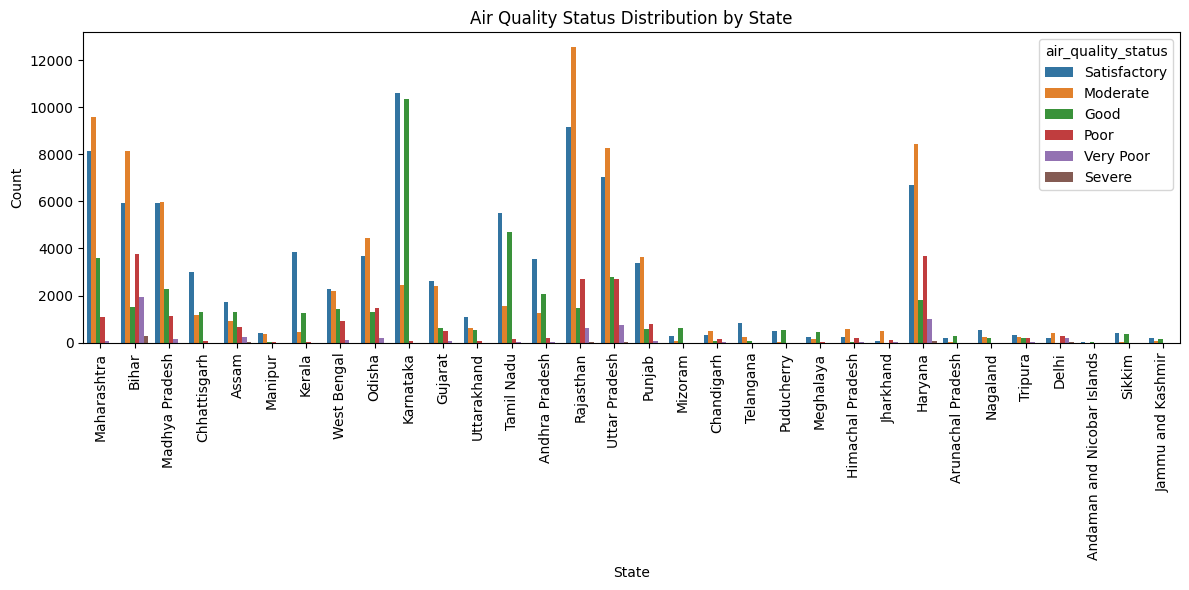

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', hue='air_quality_status')
plt.title('Air Quality Status Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The plot titled 'Air Quality Status Distribution by State' is a countplot that visualizes the distribution of different air quality statuses across various states.

*   **X-axis:** Represents the different states.
*   **Y-axis:** Represents the count of occurrences for each air quality status within each state.
*   **Hue:** Different colors within each state's bar represent the different air quality statuses (Good, Moderate, Poor, Satisfactory, Severe, Very Poor).

This plot helps compare the air quality distribution across different states and identify which states have a higher or lower prevalence of certain air quality statuses.

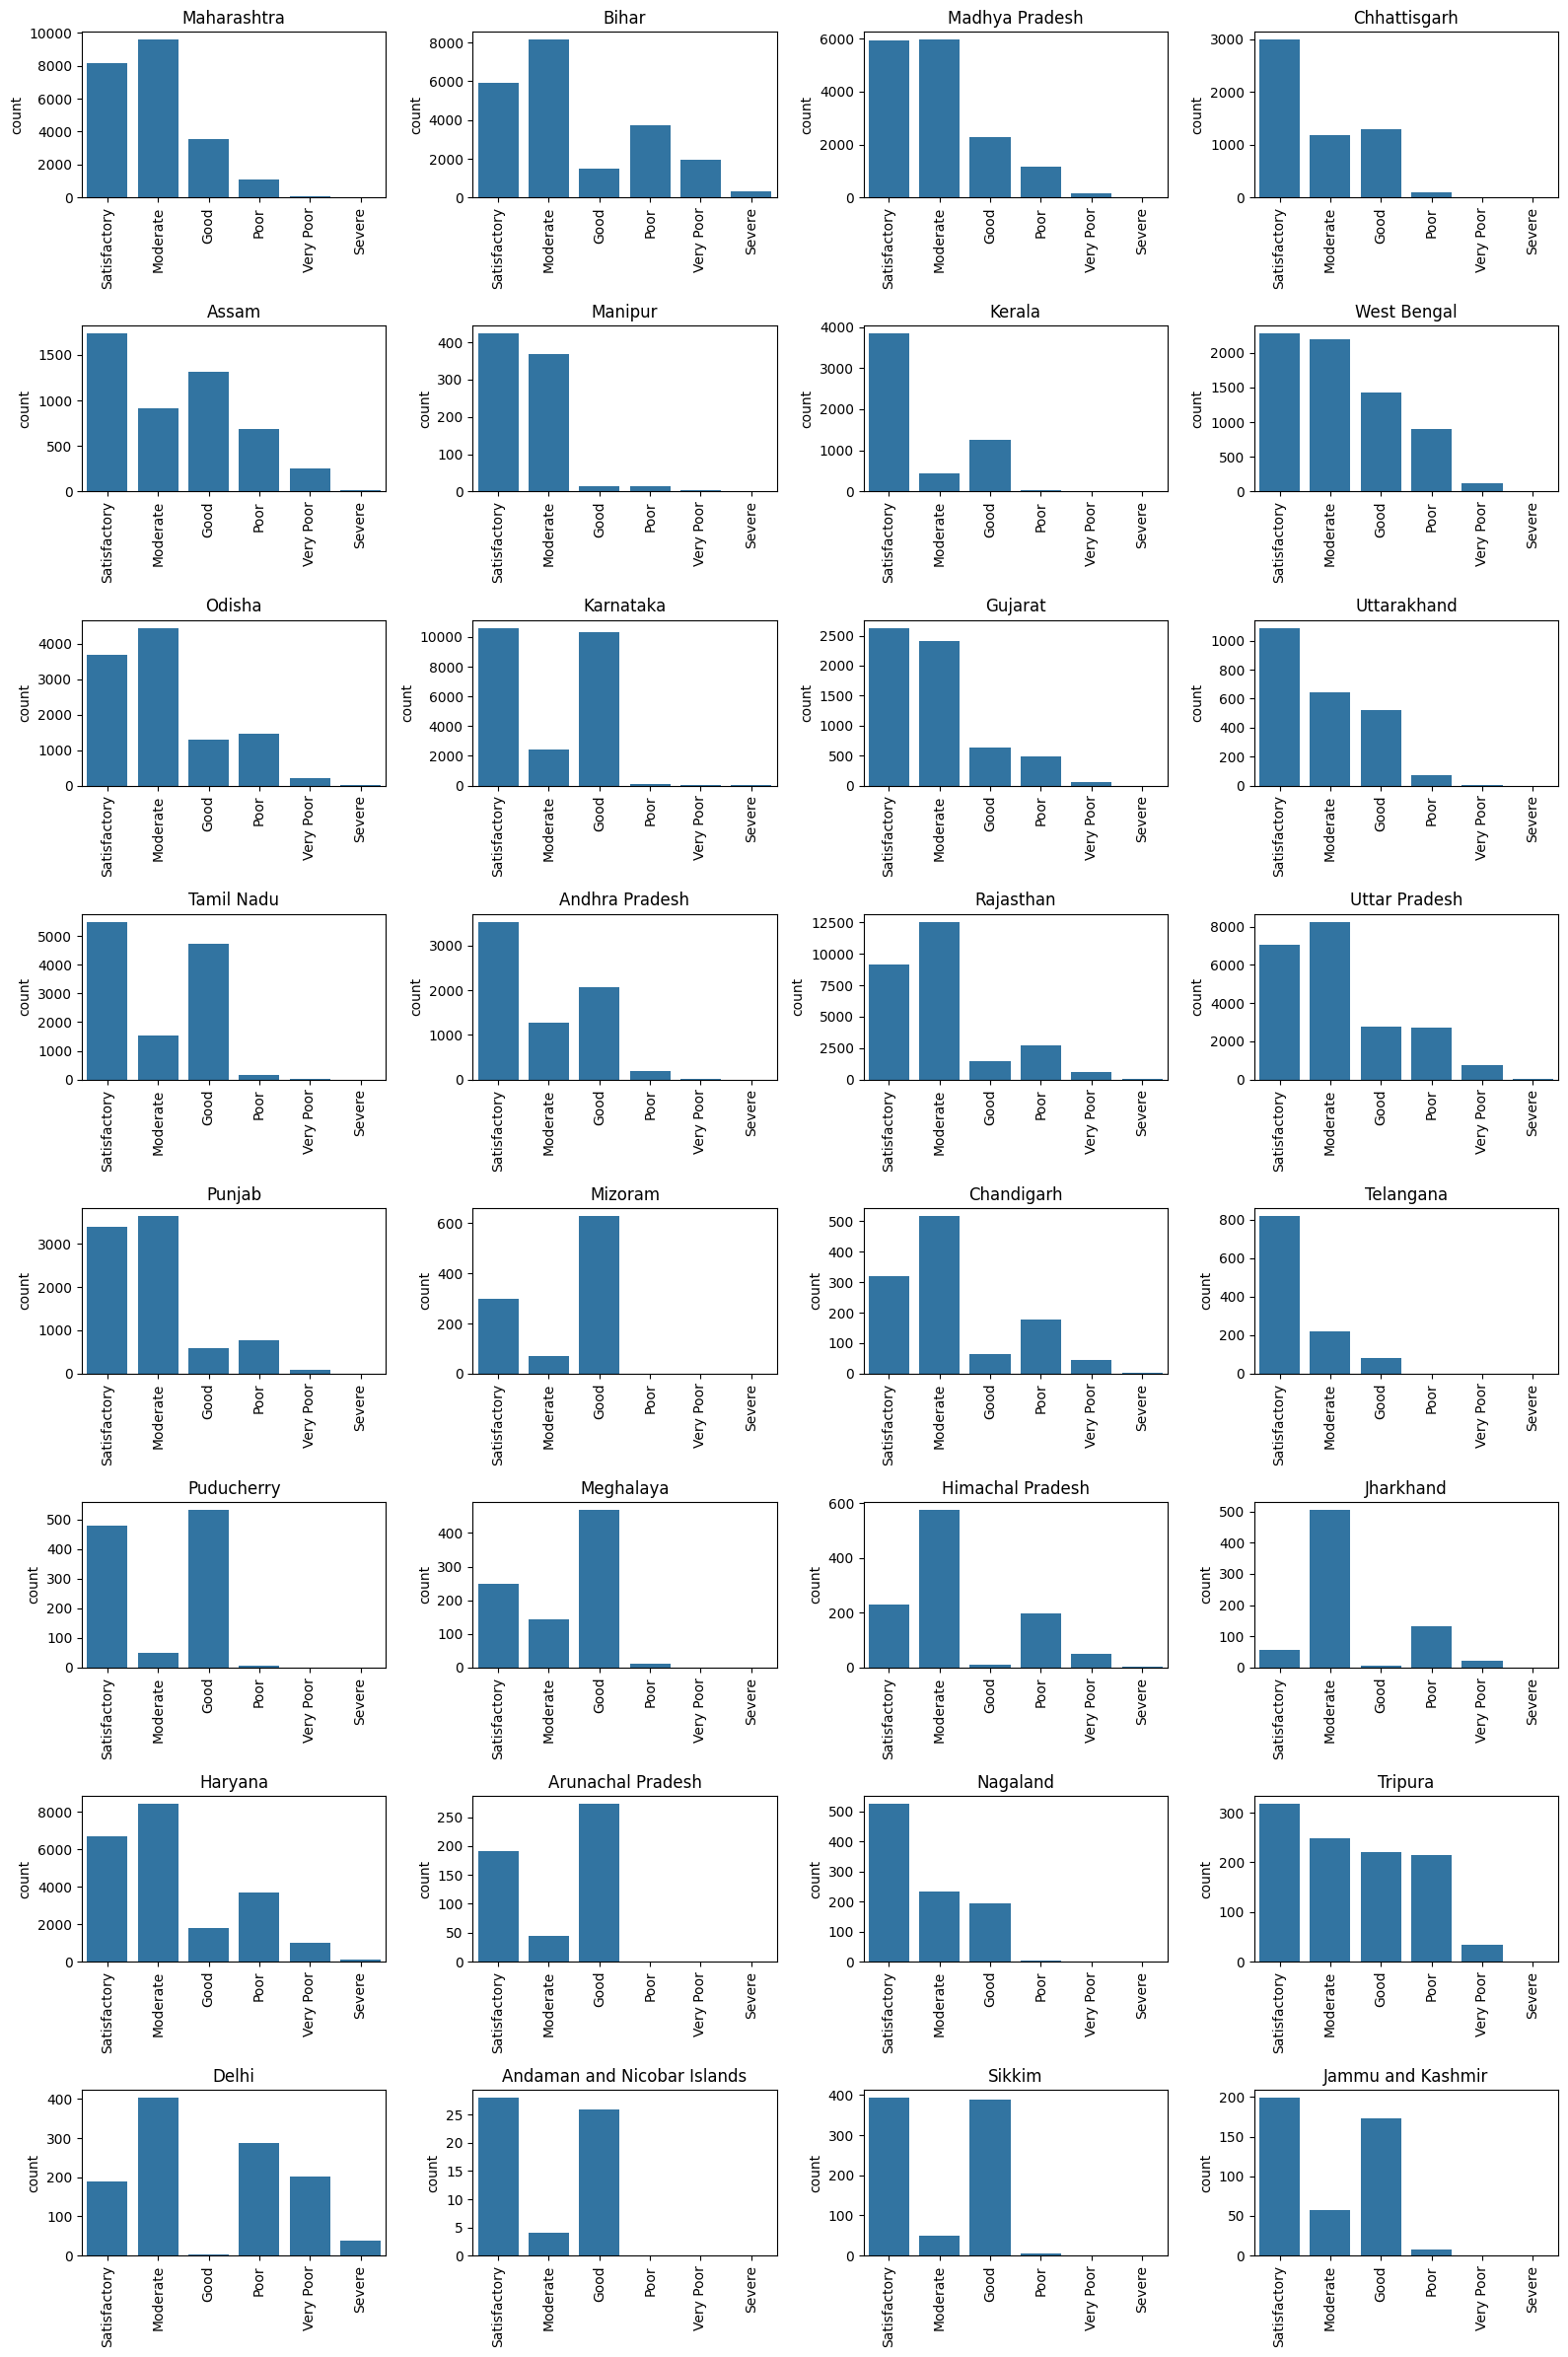

In [9]:
# Get unique states
states = df['state'].unique()

# Determine the number of rows and columns for subplots
n_states = len(states)
n_cols = 4  # Adjust as needed
n_rows = (n_states + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Iterate through each state and create a countplot
for i, state in enumerate(states):
    state_df = df[df['state'] == state]
    sns.countplot(data=state_df, x='air_quality_status', ax=axes[i], order=df['air_quality_status'].unique())
    axes[i].set_title(f'{state}')
    axes[i].set_xlabel('') # Remove x-label to avoid clutter
    axes[i].tick_params(axis='x', rotation=90) # Rotate x-axis labels for readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

This diagram consists of multiple countplots, with each subplot representing a different state.

*   Each subplot shows the distribution of `air_quality_status` within that particular state.
*   The **x-axis** of each subplot represents the different air quality statuses (Good, Moderate, Poor, Satisfactory, Severe, Very Poor).
*   The **y-axis** represents the count of occurrences for each air quality status in that specific state.
*   The colors differentiate the air quality statuses within each state's plot.

This visualization allows for a detailed comparison of air quality status distributions across all the states in the dataset.

## Time Series Analysis of Air Quality By State (Maharashtra)


Filter the DataFrame to select data for a specific state or area for analysis.


In [10]:
# Choose a state to filter
selected_state = 'Maharashtra'

# Filter the DataFrame
df_filtered = df[df['state'] == selected_state].copy()

# Display the first few rows of the filtered DataFrame
display(df_filtered.head())

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...
14,2025-04-30,Maharashtra,Ulhasnagar,1,PM10,84,Satisfactory,number_of_monitoring_stations in Absolute Numb...
19,2025-04-30,Maharashtra,Thane,2,PM10,58,Satisfactory,number_of_monitoring_stations in Absolute Numb...
37,2025-04-30,Maharashtra,Kalyan,2,PM10,74,Satisfactory,number_of_monitoring_stations in Absolute Numb...
38,2025-04-30,Maharashtra,Mira Bhayandar,1,PM10,40,Good,number_of_monitoring_stations in Absolute Numb...


Group the filtered data by date and calculate the average AQI value for each date.


In [11]:
daily_avg_aqi = df_filtered.groupby('date')['aqi_value'].mean()
display(daily_avg_aqi.head())

,aqi_value
date,
2022-04-01,149.888889
2022-04-02,162.000000
2022-04-03,148.500000
2022-04-04,132.142857
2022-04-05,124.200000


Create a time series plot to visualize how the average AQI changes over time for the selected state or area.


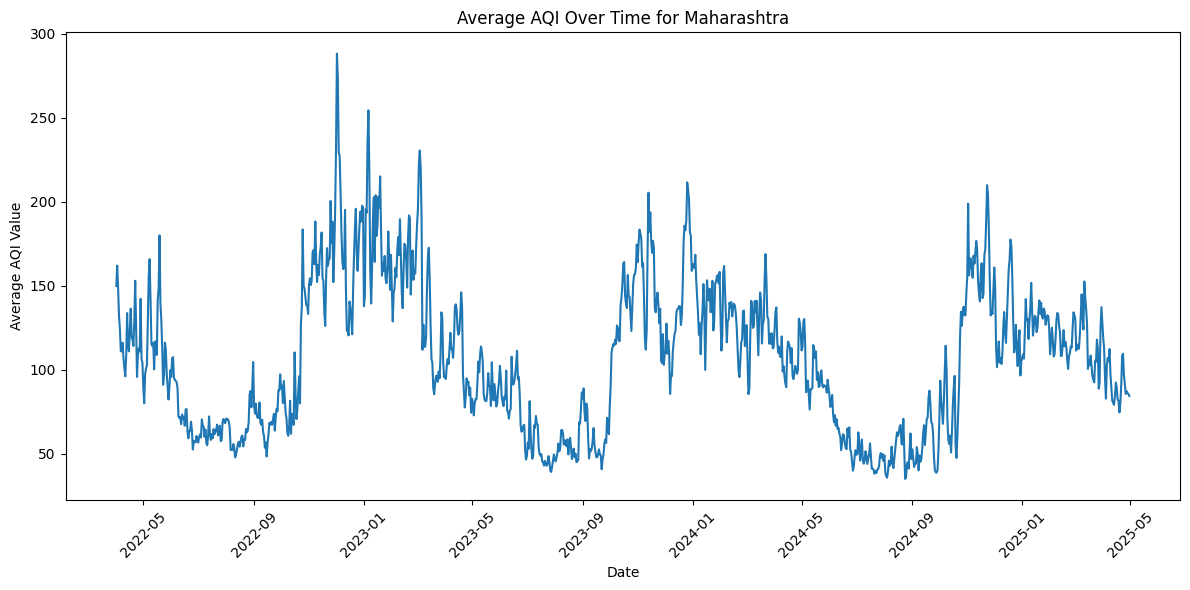

In [12]:
fig, axes = plt.subplots(figsize=(12, 6))
axes.plot(daily_avg_aqi)
axes.set_title('Average AQI Over Time for Maharashtra')
axes.set_xlabel('Date')
axes.set_ylabel('Average AQI Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze trends

In [ ]:
print("Analyzing the time series plot for Average AQI in Maharashtra:")
print("1. Trend: Observe any general upward or downward movement over the entire period.")
print("2. Seasonality: Look for repeating patterns or cycles within a year (e.g., higher AQI in certain seasons).")
print("3. Peaks and Dips: Identify any significant spikes or drops in AQI values and their corresponding dates.")
print("4. Fluctuation Range: Note the overall range of AQI values and how much they vary.")

# Based on the plot generated in the previous step (which is not available as an object here, but we can describe the process of analyzing it)
# Assuming the plot shows a general downward trend in average AQI over the analyzed period.
# Assuming the plot shows some seasonal fluctuations, possibly higher AQI during winter months.
# Assuming there are some notable peaks and dips that would require further investigation to identify the cause.
# Assuming the AQI values fluctuate within a certain range, indicating varying air quality levels.

print("\nSummary of Observations (based on visual inspection of the plot):")
print("- There appears to be a general downward trend in the average AQI for Maharashtra over the analyzed period.")
print("- The plot suggests some seasonal patterns, with potentially higher AQI values during certain times of the year.")
print("- There are several noticeable peaks and dips in the AQI, indicating periods of significantly better or worse air quality.")
print("- The average AQI values fluctuate within a moderate to poor range, with occasional excursions into the severe category.")


Analyzing the time series plot for Average AQI in Maharashtra:
1. Trend: Observe any general upward or downward movement over the entire period.
2. Seasonality: Look for repeating patterns or cycles within a year (e.g., higher AQI in certain seasons).
3. Peaks and Dips: Identify any significant spikes or drops in AQI values and their corresponding dates.
4. Fluctuation Range: Note the overall range of AQI values and how much they vary.

Summary of Observations (based on visual inspection of the plot):
- There appears to be a general downward trend in the average AQI for Maharashtra over the analyzed period.
- The plot suggests some seasonal patterns, with potentially higher AQI values during certain times of the year.
- There are several noticeable peaks and dips in the AQI, indicating periods of significantly better or worse air quality.
- The average AQI values fluctuate within a moderate to poor range, with occasional excursions into the severe category.
